In [1]:
import pandas as pd

DATA = '/kaggle/input/toyota-motors-stock-data-2980-2024/Toyota_Data.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,year
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,1980
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,1980
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,1980
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,1980
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,1980


Let's look at the price/volume correlations.

In [2]:
df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,0.991369,0.991281,0.991450,0.979054,0.281017
Close,0.991369,1.000000,0.999953,0.999953,0.991121,0.301755
High,0.991281,0.999953,1.000000,0.999924,0.991119,0.303710
Low,0.991450,0.999953,0.999924,1.000000,0.991014,0.299151
Open,0.979054,0.991121,0.991119,0.991014,1.000000,0.312267
Volume,0.281017,0.301755,0.303710,0.299151,0.312267,1.000000


What do we see in the price/volume correlations? 
* We don't have any perfectly correlated columns
* Prices and volumes are somewhat positively correlated, which is unusual.

Let's look at the price time series.

<Axes: xlabel='Date', ylabel='Adj Close'>

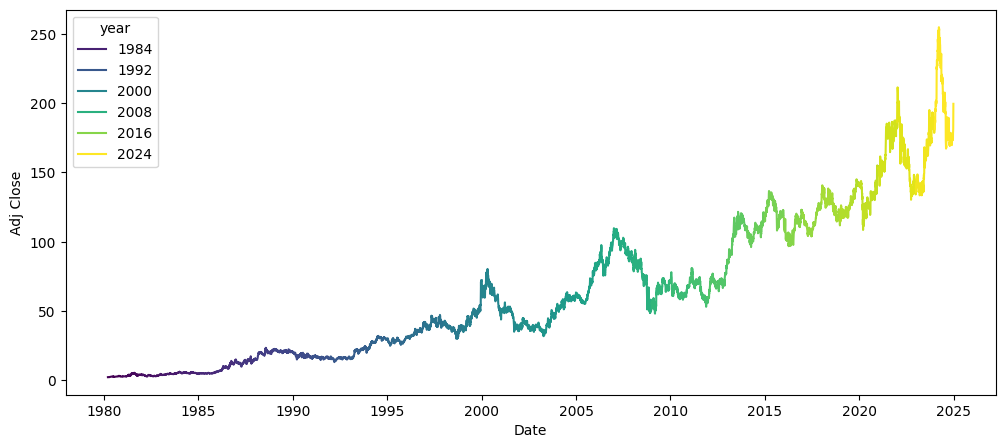

In [3]:
import matplotlib.pyplot as plt
from seaborn import lineplot
from warnings import filterwarnings

filterwarnings(action='ignore', category=FutureWarning)

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
lineplot(palette='viridis', data=df, x='Date', y='Adj Close', hue='year', )

What to we see? We see gradual price appreciation in nominal terms over 45 years, subject to occasional sometimes dramatic reversals. Let's look at the log of the prices over time to see if there's also lots of volatility in the flat-looking early years.

<Axes: xlabel='Date', ylabel='Adj Close'>

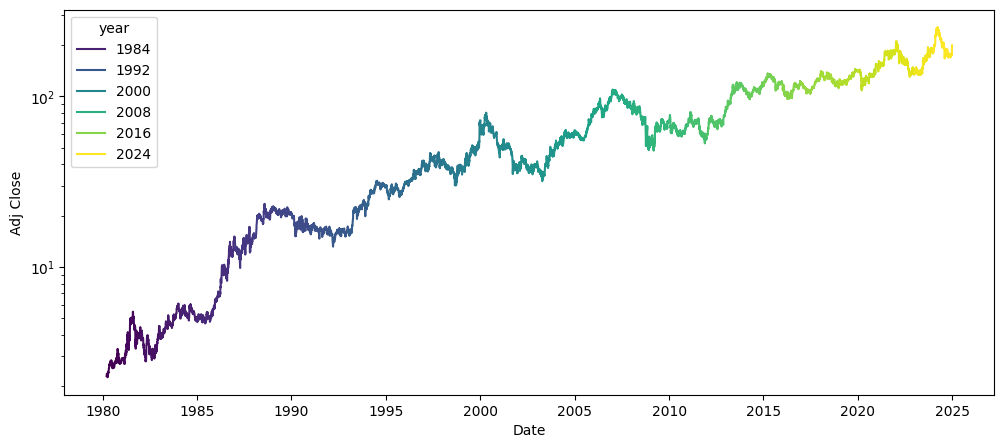

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
lineplot(palette='viridis', data=df, x='Date', y='Adj Close', hue='year', )

What to we see? We see that occasional reversals have always been part of the Toyota story. We also see that the best time to own Toyota stock was probably in the late 1980s.

Let's turn our attention to the trading volume. 

<Axes: xlabel='Date', ylabel='Volume'>

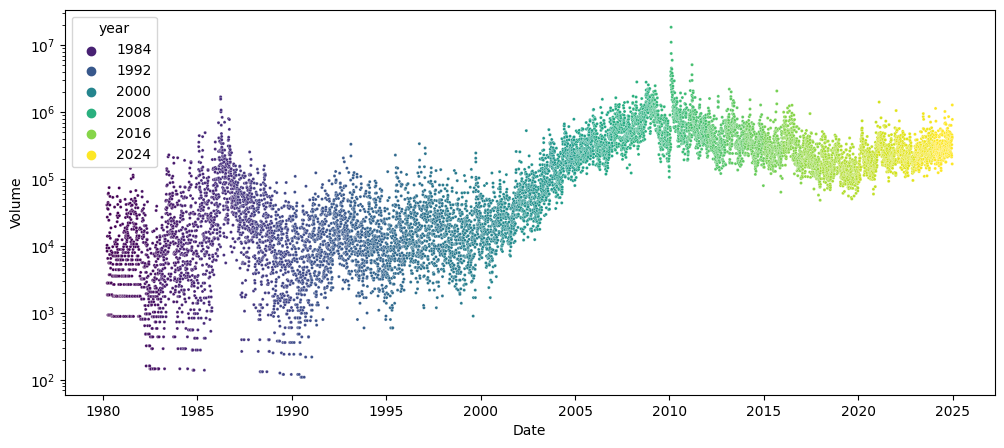

In [5]:
from seaborn import scatterplot
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Volume', hue='year', )

What do we see? We need to look at the log of the volume over time, because the volume is actually dominated by a few outliers, and looking at the log of the volume instead gives us a better sense of the volume movement over time. It is interesting to see that while the price has risen over time, if not always steadily, daily trading volume has also generally increased, with a downard trend over the course of the 2010s. 

Let's look at the volume as a function of the price. We'll use the year to add another dimension to our data, indicating the passage of time.

<Axes: xlabel='Adj Close', ylabel='Volume'>

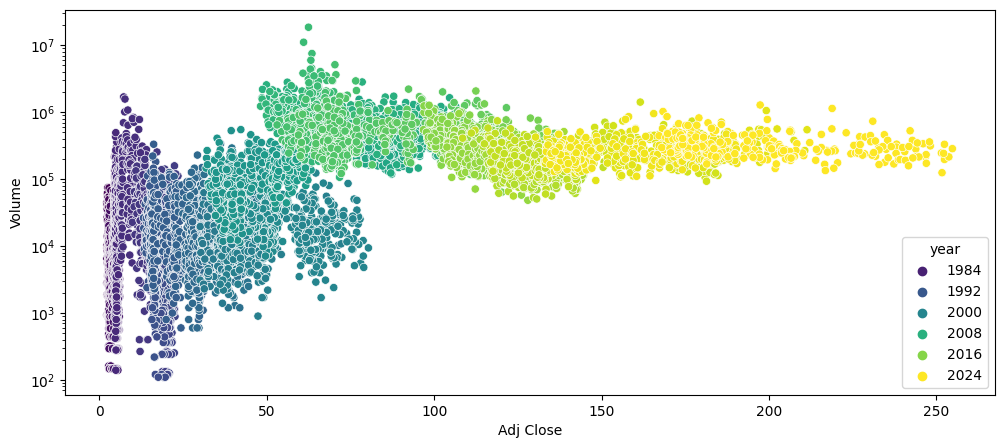

In [6]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', data=df, x='Adj Close', y='Volume', hue='year', )

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11291 non-null  datetime64[ns]
 1   Adj Close  11291 non-null  float64       
 2   Close      11291 non-null  float64       
 3   High       11291 non-null  float64       
 4   Low        11291 non-null  float64       
 5   Open       11291 non-null  float64       
 6   Volume     11291 non-null  int64         
 7   year       11291 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 661.7 KB
